# **Importing  the required modules**

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# **Loading the image**

Image format: PNG
Image mode: L
Image size: (512, 512)


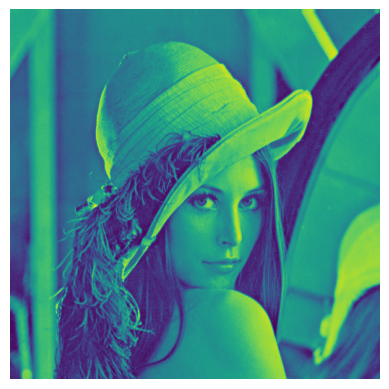

In [33]:
def load_image(filename):
    return Image.open(filename)

def show_image(image):
    print("Image format:", image.format)
    print("Image mode:", image.mode)
    print("Image size:", image.size)

    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()
        
image = load_image('image.png')
show_image(image)

In [34]:
# # scale the image to 80% pixels if the image is too big
# image = image.resize((int(image.size[0]*0.2), int(image.size[1]*0.2)))
# show_image(image)

# **Edge Detection**

## **Vertical**

Applying vertical filter for edge detection
Image format: None
Image mode: RGB
Image size: (512, 512)


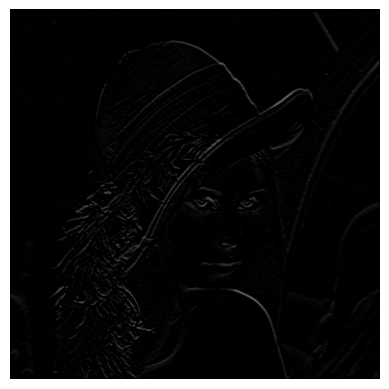

Applying horizontal filter for edge detection
Image format: None
Image mode: RGB
Image size: (512, 512)


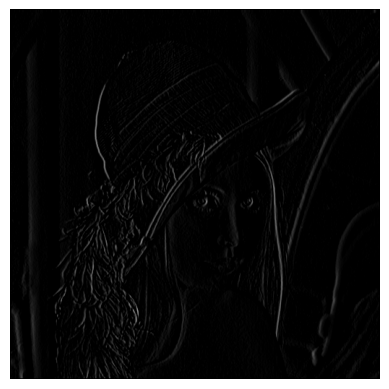

In [52]:
def apply_filter(image, kernel):
    width, height = image.size
    filtered_image = Image.new("RGB", (width, height))  # Create a new image to store the filtered result
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            pixel = [0, 0, 0]  # Initialize pixel with zeros for each channel (R, G, B)
            for i in range(3):
                for j in range(3):
                    # Get pixel value from the image
                    try:
                        pixel_value = image.getpixel((x + i - 1, y + j - 1))
                        if isinstance(pixel_value, int):  # Convert to tuple if pixel_value is an integer
                            pixel_value = (pixel_value, pixel_value, pixel_value)
                        pixel[0] += pixel_value[0] * kernel[i][j]  # Update R channel
                        pixel[1] += pixel_value[1] * kernel[i][j]  # Update G channel
                        pixel[2] += pixel_value[2] * kernel[i][j]  # Update B channel
                    except IndexError:
                        # Ignore pixels outside the image boundaries
                        pass
            # Update the pixel in the filtered image
            filtered_image.putpixel((x, y), (pixel[0] // 16, pixel[1] // 16, pixel[2] // 16))  # Assuming RGB image
    return filtered_image

vertical_filter = [
    [-4, 0, 4],
    [-8, 0, 8],
    [-4, 0, 4]
]

horizontal_filter = [
    [-4, -8, -4],
    [0, 0, 0],
    [4, 8, 4]
]

# Apply vertical filter for edge detection
print("Applying vertical filter for edge detection")
image_vertical_filter = apply_filter(image, vertical_filter)
show_image(image_vertical_filter)

# Apply horizontal filter for edge detection
print("Applying horizontal filter for edge detection")
image_horizontal_filter = apply_filter(image, horizontal_filter)
show_image(image_horizontal_filter)

## **Horizontal**